<a href="https://colab.research.google.com/github/Ivan1steer/ML_lab/blob/main/ML_lab2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/star_classification.csv')
data.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

obj_ID = Идентификатор объекта, уникальное значение, которое идентифицирует объект в каталоге изображений, используемом CAS
alpha = Угол прямого восхождения (в эпоху J2000)
delta = Угол склонения (в эпоху J2000)
u = Ультрафиолетовый фильтр в фотометрической системе
g = Зеленый фильтр в фотометрической системе
r = Красный фильтр в фотометрической системе
i = Фильтр ближнего инфракрасного диапазона в фотометрической системе
z = Инфракрасный фильтр в фотометрической системе
run_ID = Номер запуска, используемый для идентификации конкретного сканирования
rereun_ID = Номер повтора, указывающий, как было обработано изображение
cam_col = Столбец камеры для идентификации строки сканирования в ходе сканирования
field_ID = Номер поля для идентификации каждого поля
spec_obj_ID = Уникальный идентификатор, используемый для оптических спектроскопических объектов (это означает, что 2 разных наблюдения с одинаковым spec_obj_ID должны иметь общий выходной класс)
class = Класс объекта (галактика, звезда или квазар)
redshift = значение красного смещения, основанное на увеличении длины волны
plate = идентификатор пластины, идентифицирует каждую пластину в SDSS
MJD = модифицированная юлианская дата, используется для указания того, когда была получена данная часть данных SDSS
fiber_ID = идентификатор волокна, который идентифицирует волокно, направлявшее свет на фокальную плоскость в каждом наблюдении

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

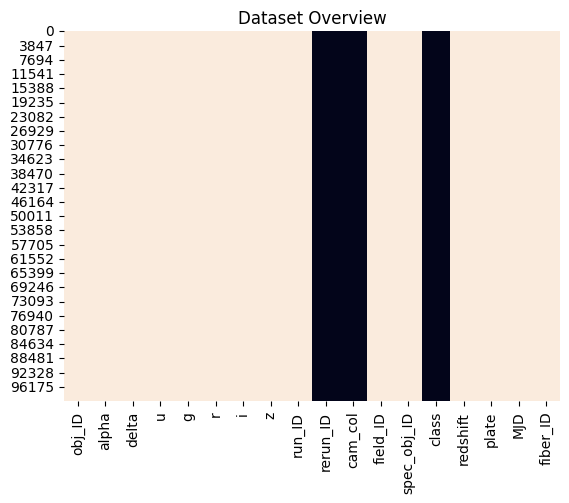

In [ ]:
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"
dic_cols = {col:utils_recognize_type(data, col, max_cat=20) for col in data.columns}


heatmap = data.isnull()

for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)

sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')

plt.show()

В датасете отсутсвуют пустые значения и категориальные признаки

In [ ]:
data['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

Датасет несбалансированный

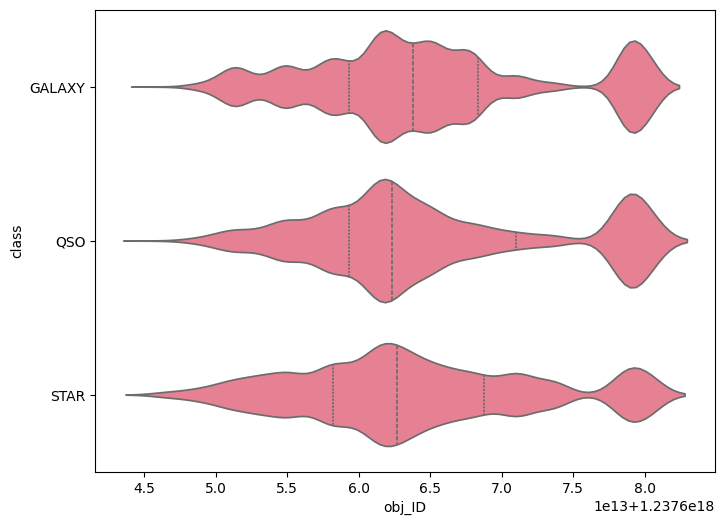

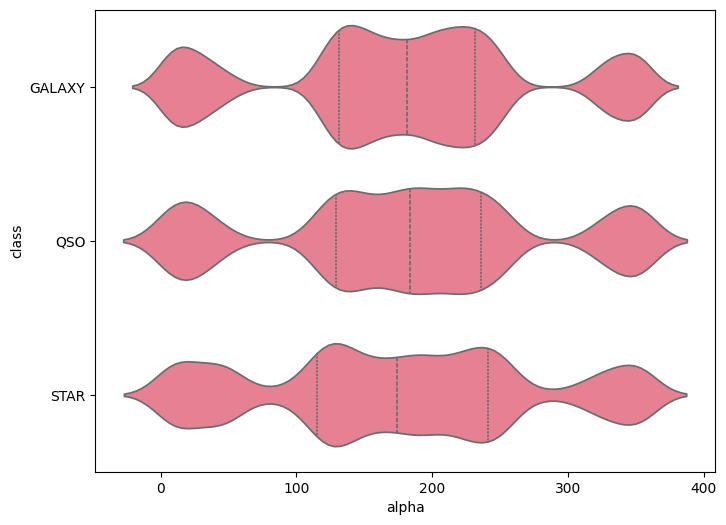

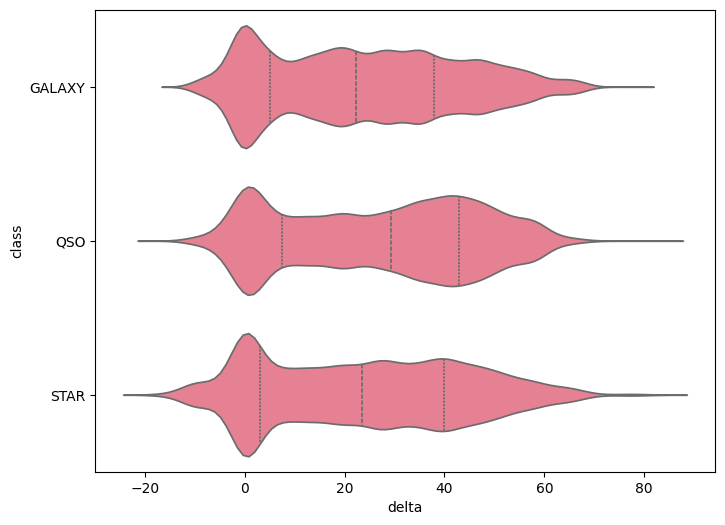

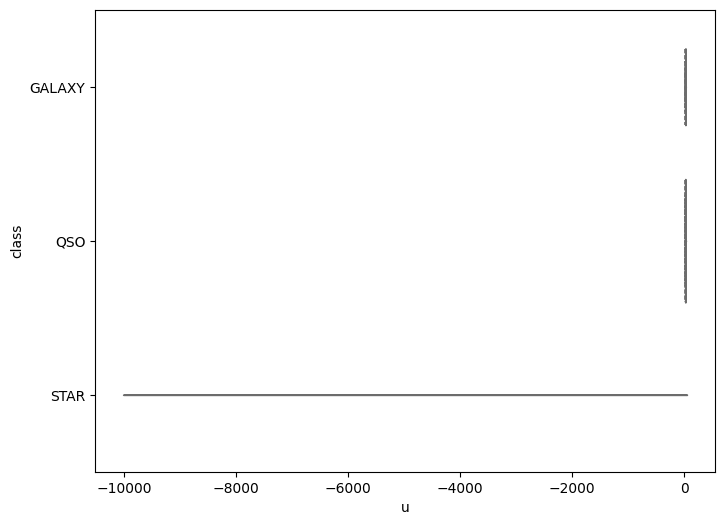

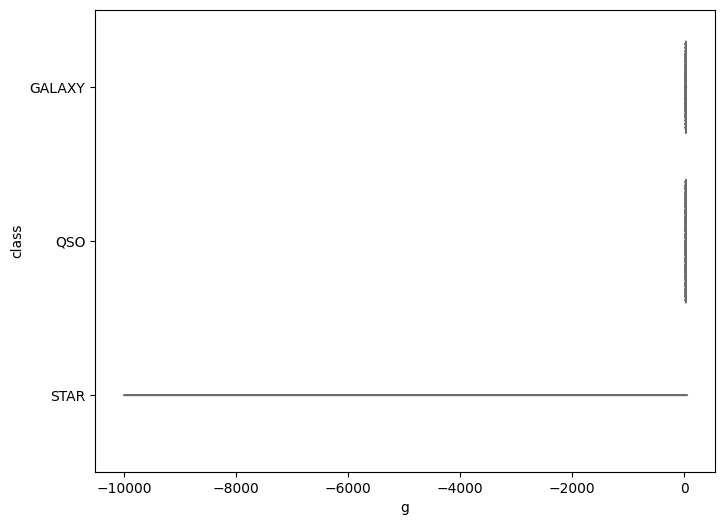

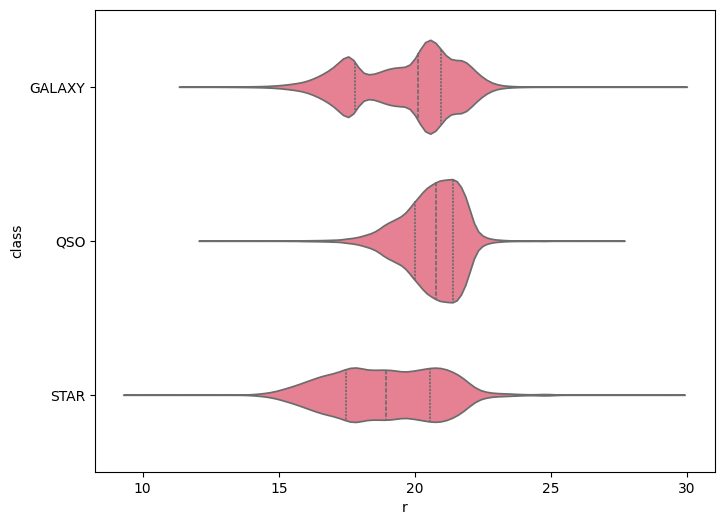

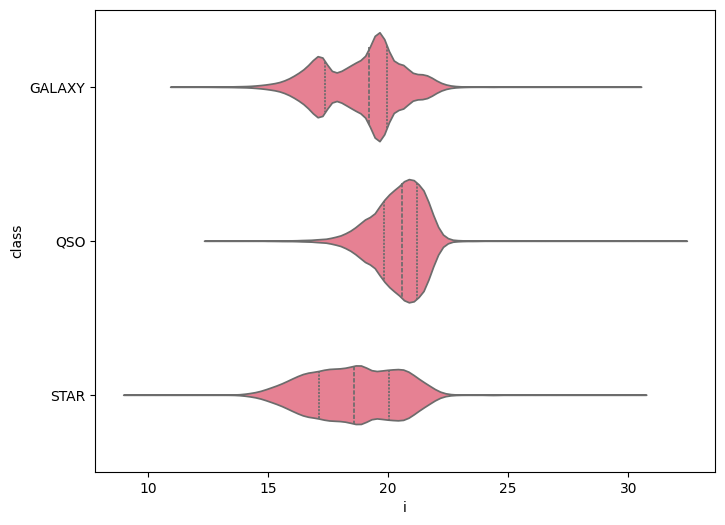

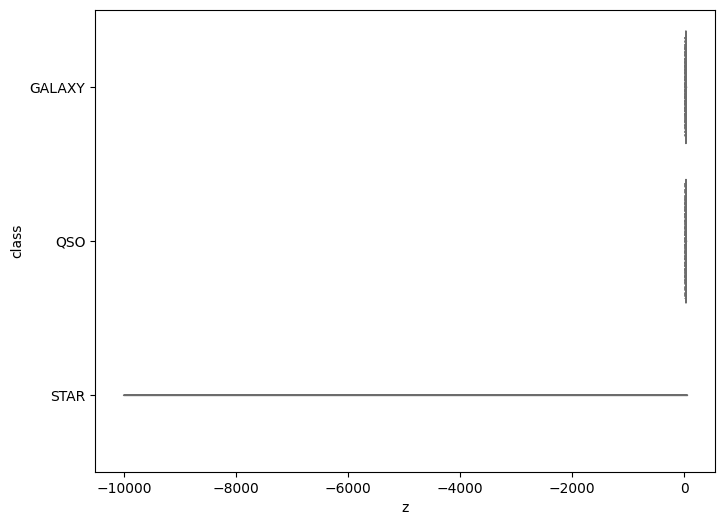

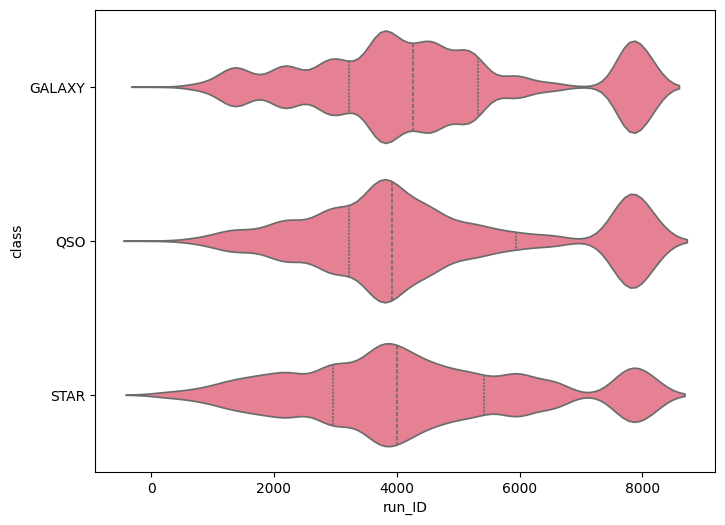

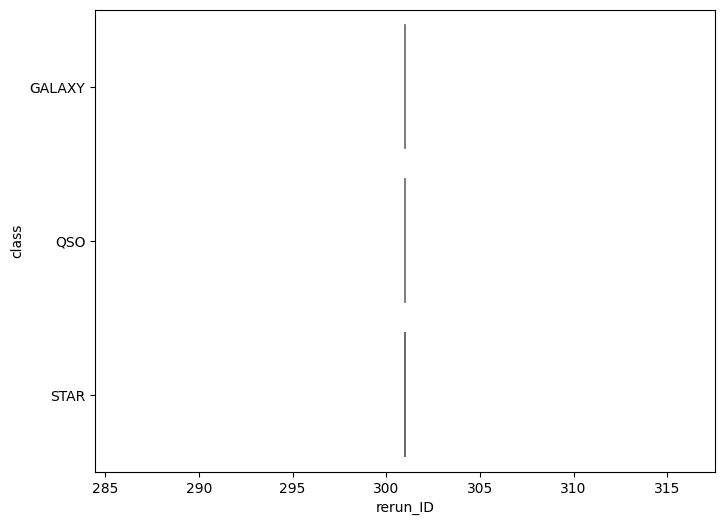

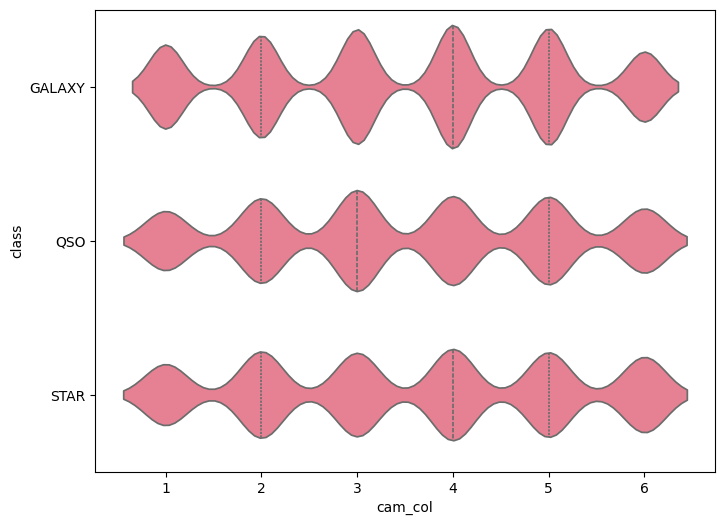

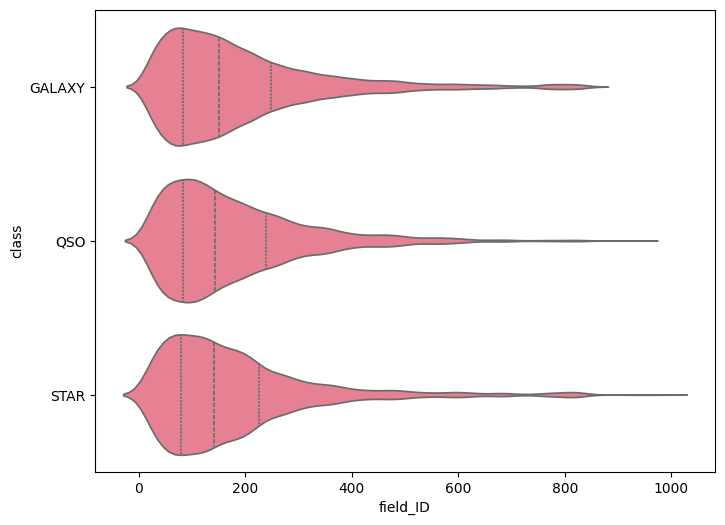

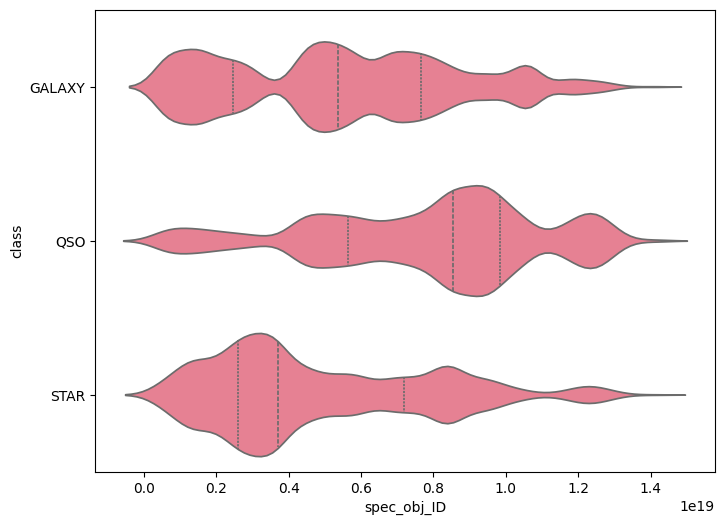

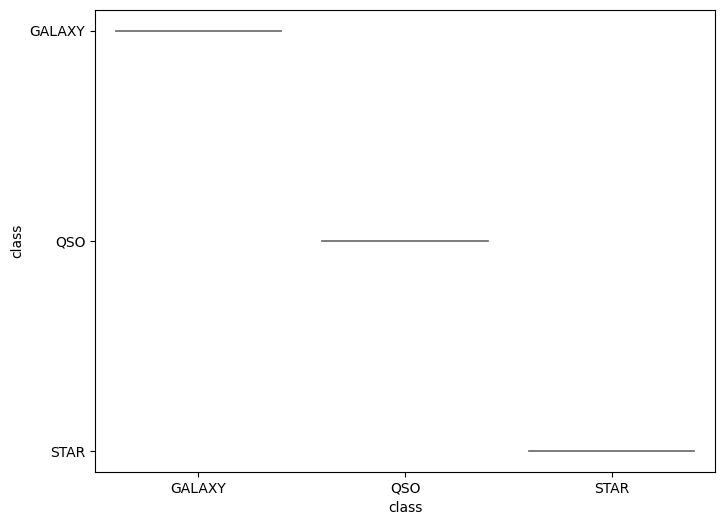

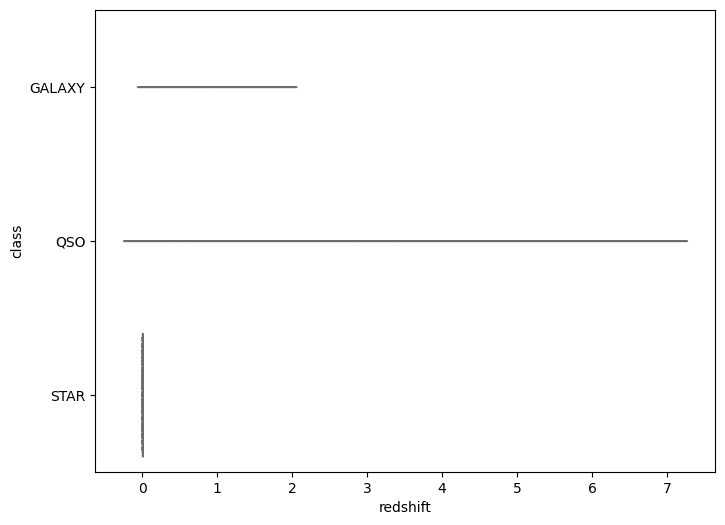

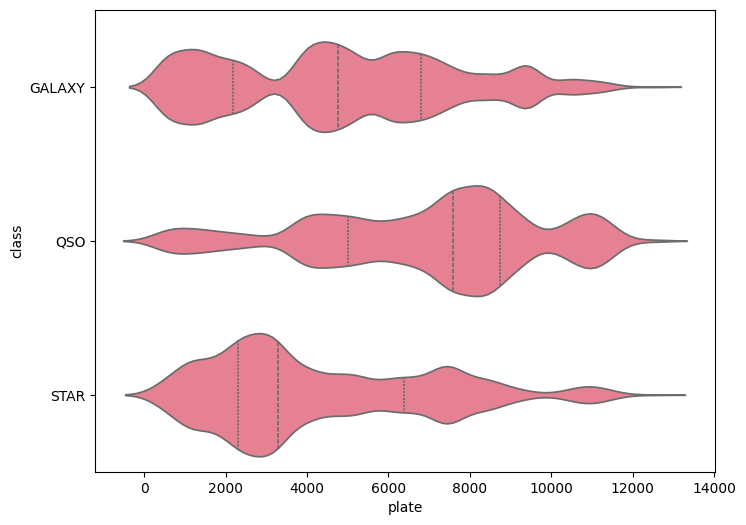

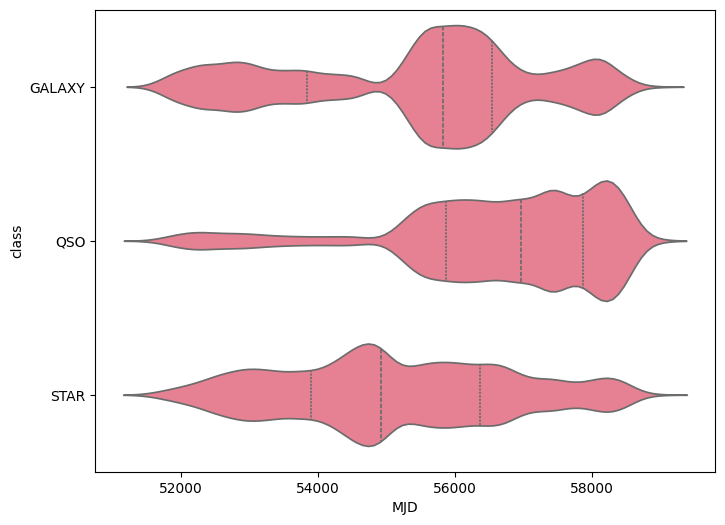

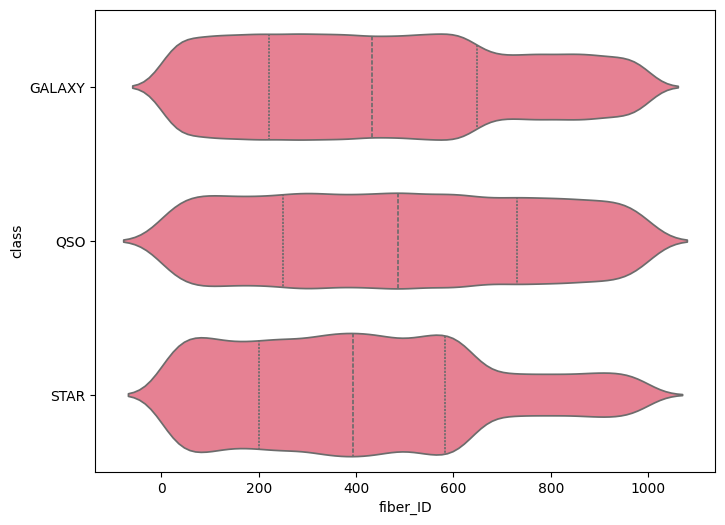

In [ ]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:
for col in data.columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(y='class', x=data[col], data=data, inner='quartile')
    plt.show()

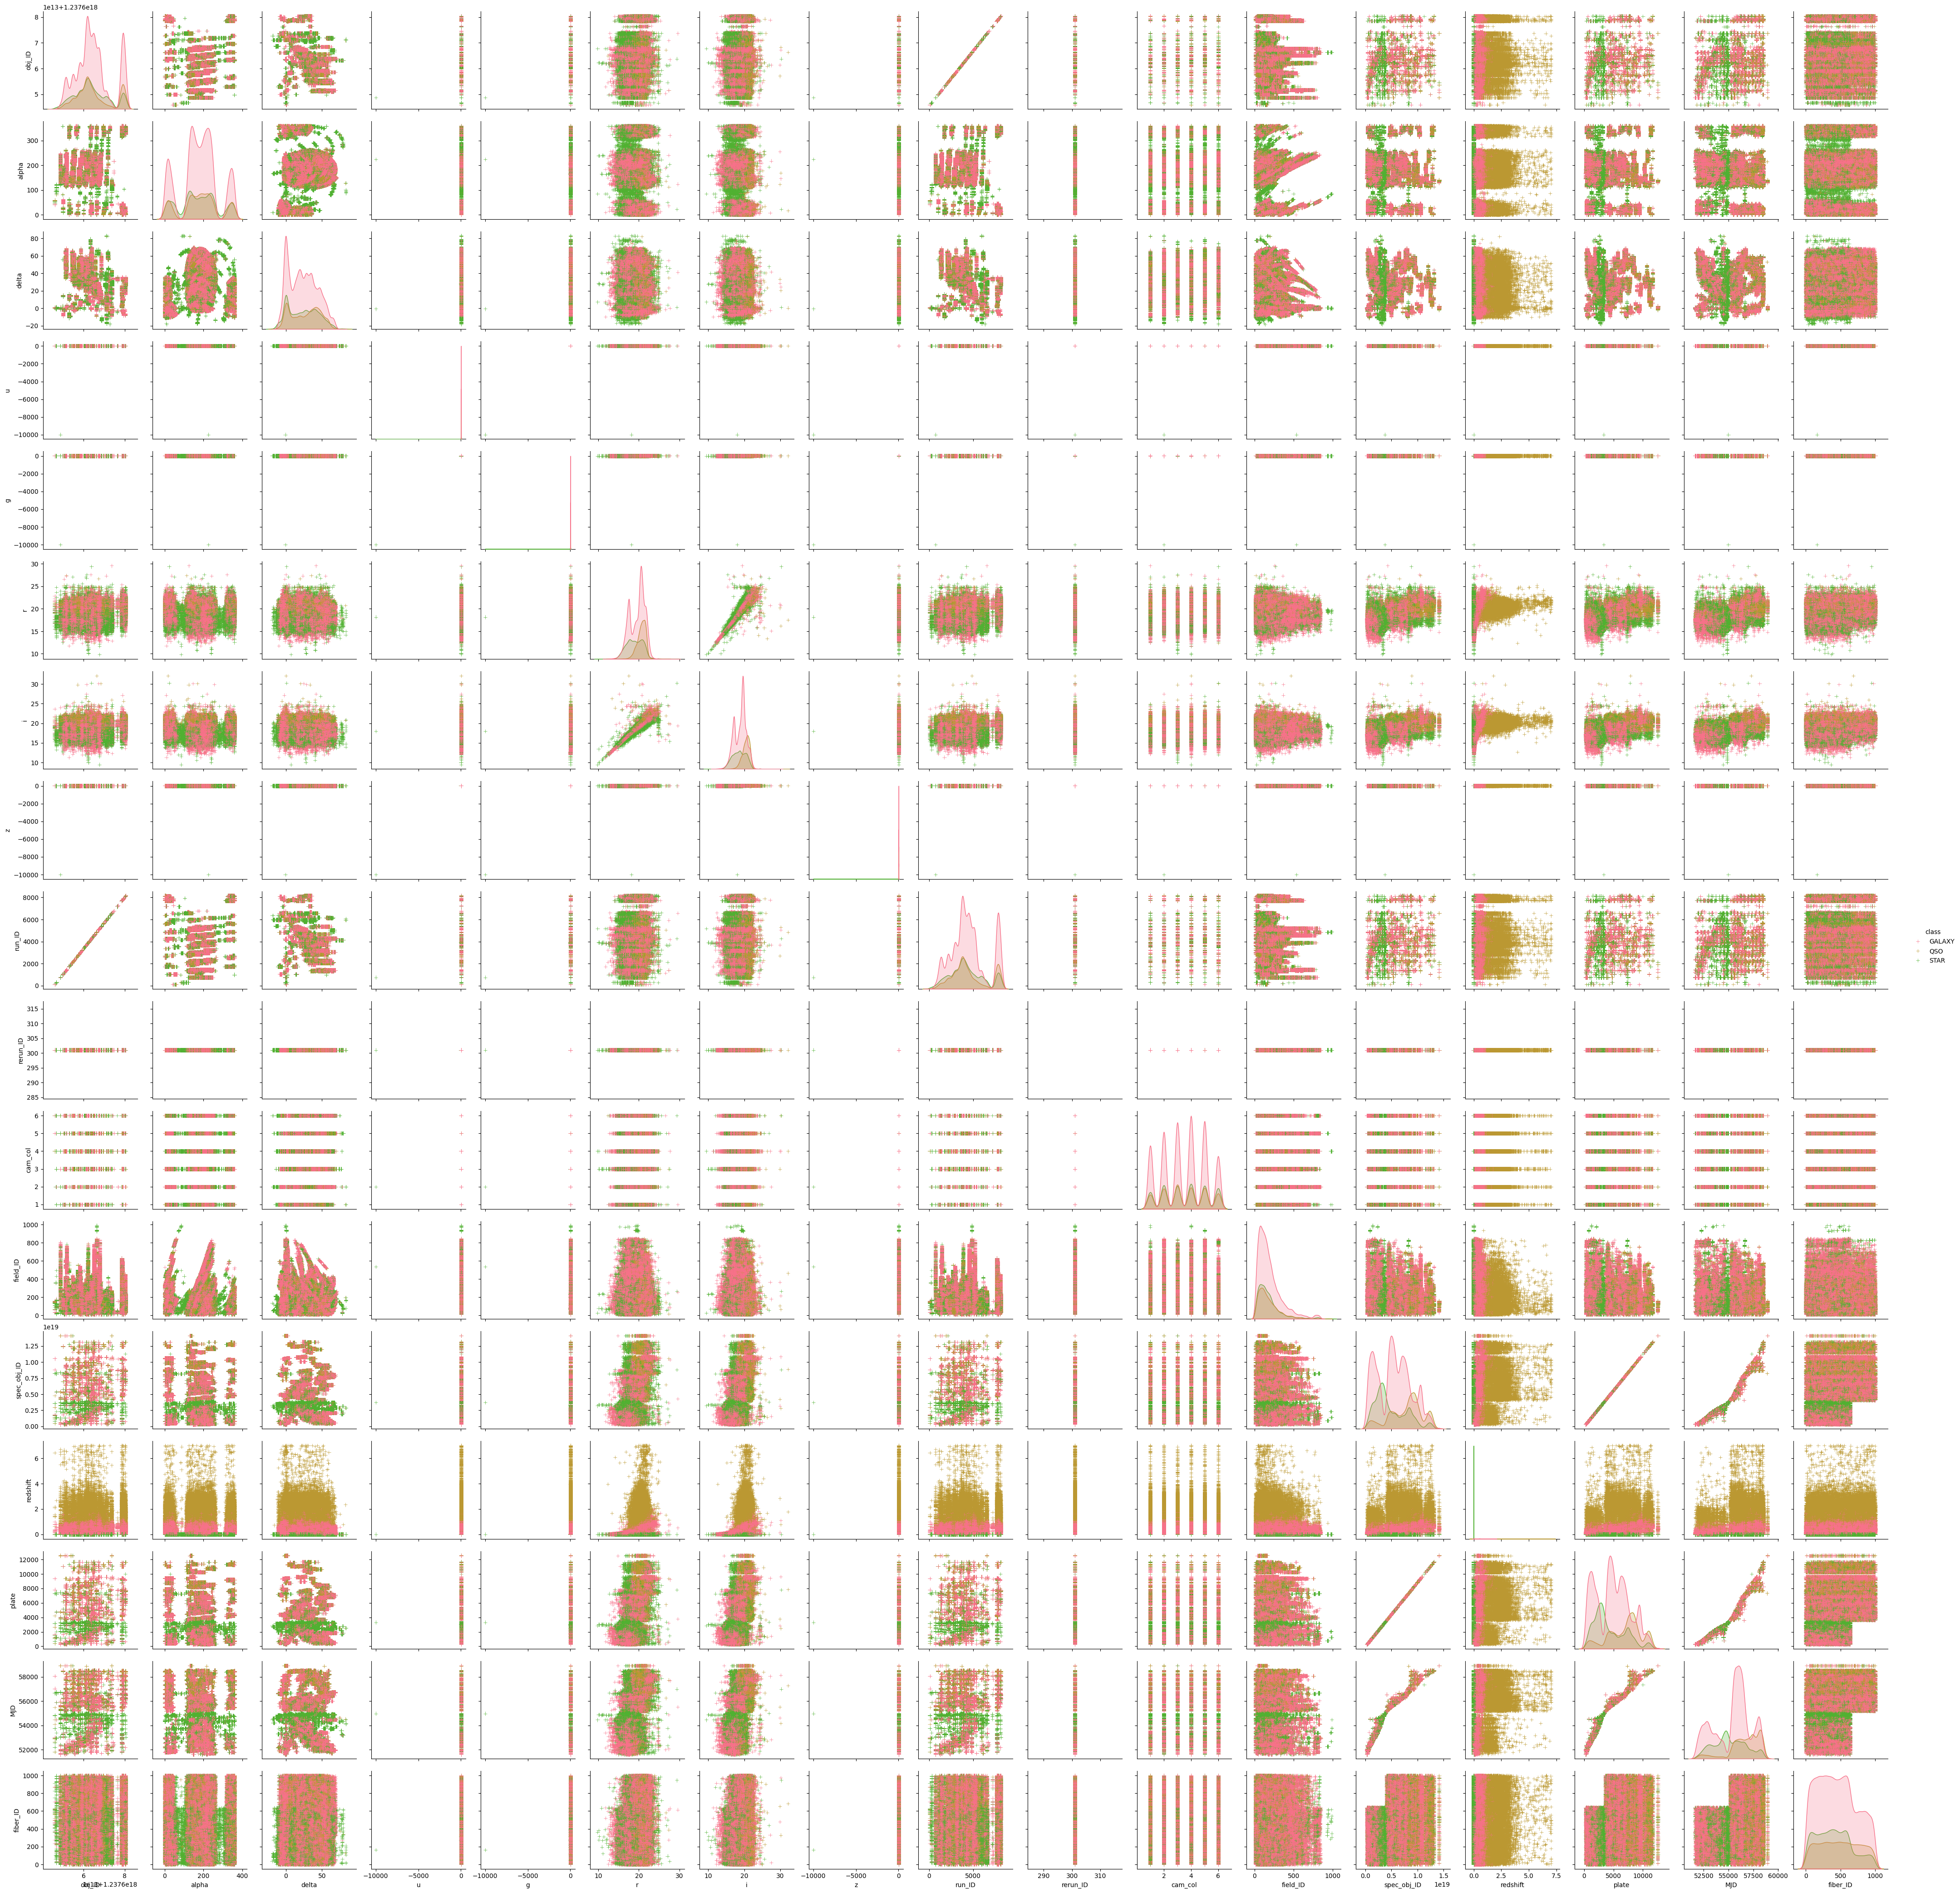

In [ ]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

sns.pairplot(data, hue='class', markers='+')
plt.show()

Можно заметить, что объекты типа "Квазар" довольно сильно выделяются среди звезд и галактик

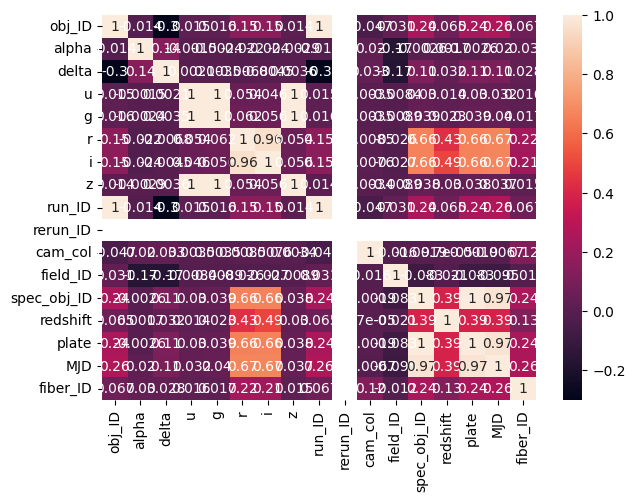

In [ ]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(7,5))
sns.heatmap(data.corr(numeric_only = True), annot=True)
plt.show()

In [ ]:
data["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in data["class"]]
corr = data.corr()
corr["class"].sort_values()

field_ID      -0.038044
u             -0.017701
g             -0.005915
run_ID        -0.000049
obj_ID        -0.000047
alpha          0.004552
cam_col        0.014476
z              0.017352
fiber_ID       0.032053
delta          0.056643
r              0.150691
MJD            0.207262
spec_obj_ID    0.215722
plate          0.215722
i              0.284396
redshift       0.536822
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

Уберем те значения, корреляция которых минимальна

In [ ]:
data = data.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

Разберемся с несбалансированностью данных

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
x = data.drop(['class'], axis = 1)
y = data.loc[:,'class'].values
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 59445, 1: 21594, 2: 18961})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Resampled dataset shape Counter({0: 59445, 2: 59445, 1: 59445})


Теперь наш датасет сбалансированный


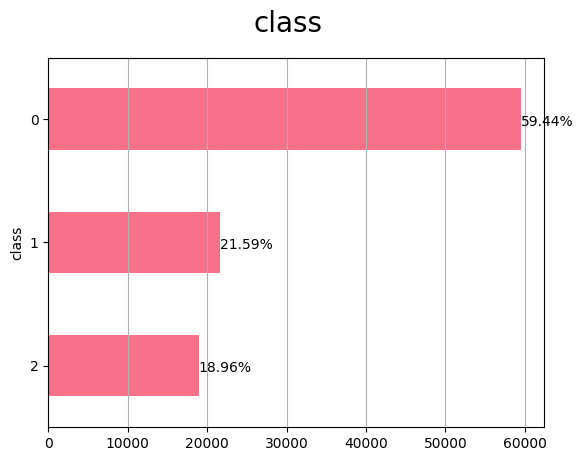

In [ ]:
y ="class"
ax = data[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
            str(round((i.get_width()/total)*100, 2))+'%',
            fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

In [ ]:
X = data.drop(['class'], axis=1)
y = data['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (100000, 9) | y shape: (100000,) 


In [ ]:
import scipy.stats as stats
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)
stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=0.0020077617866722185, pvalue=0.9983980429499124, df=99998.0)

In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.1, stratify=y_train, random_state=1)
# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_sample, y_sample, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.594500 (0.000612)
LDA: 0.858375 (0.009619)
KNN: 0.675000 (0.010811)
CART: 0.966375 (0.003971)
NB: 0.601750 (0.006572)
SVC: 0.594500 (0.000612)


CART показал наилучшую метрику, его и будем использовать

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.96445


Визуализируем полученные данные:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


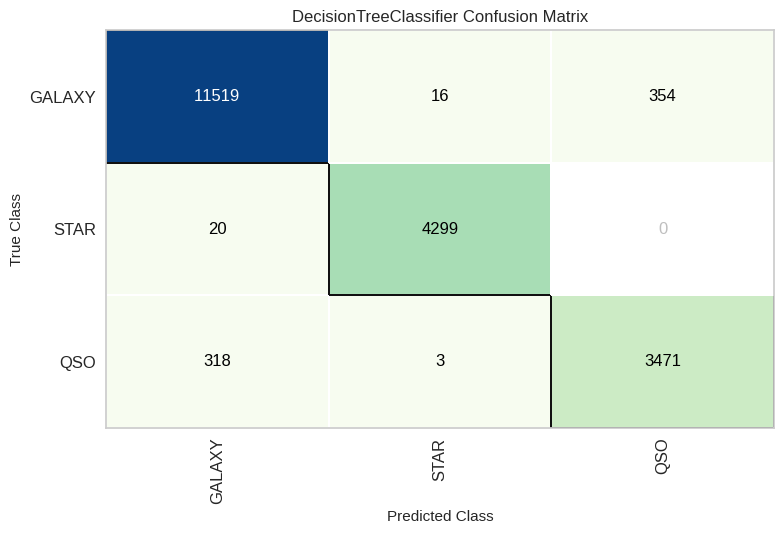

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
classes = ['GALAXY','STAR','QSO']
cm = ConfusionMatrix(clf, classes=classes, cmap='GnBu')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y_test, y_pred)#Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y_test, y_pred, average="weighted")
precision = metrics.precision_score(y_test, y_pred, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, y_pred, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.96
Precision (confidence when predicting a 1): 0.96
Detail:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11889
           1       1.00      1.00      1.00      4319
           2       0.91      0.92      0.91      3792

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000

